In [1]:
# AULA 1 - ANÁLISE DE DADOS COM PANDA
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print(f"linhas: {linhas}\nColunas: {colunas}")

linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
#Renomeação das colunas
novos_nomes_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
#Aplicando a renomeação
df.rename(columns=novos_nomes_colunas, inplace=True)

#Verificando
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [10]:
'''ANALISANDO QUAIS SÃO AS CATEGORIAS DAS COLUNAS CATEGÓRIAS'''
#NIVEL DE SENIORIDADE
#O MÉTODO .value_counts() SERVE PARA CONTAR QUANTAS VEZES CADA VALOR ÚNICO APARECE EM UMA COLUNA.
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [11]:
#TIPO DE CONTRATO
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [12]:
#REGIME DE TRABALHO
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [13]:
#TAMANHO DA EMPRESA
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [14]:
#MODIFICANDO O NOME DAS CATEGORIAS
senioridade ={
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senioridade
Senior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64

In [15]:
tipo_contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Parcial',
    'CT': 'Contrato',
    'FL': 'Freelance'
}

df['contrato'] = df['contrato'].replace(tipo_contrato)
df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Parcial              376
Freelance             16
Name: count, dtype: int64

In [16]:
remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}

df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [17]:
tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


count -> número total de valores não nulos (não vazios)
unique -> quantidade de valores únicos distintos, ignora repetiçoes so  conta valores diferentes
top -> o valor mais comum
freq -> quantas vezes o valor mais comum aparece

In [20]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [21]:
#AULA 2 - PREPARAÇÃO E LIMPEZA DE DADOS
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [22]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [24]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [26]:
import numpy as np
#Criação de um dataframe de teste parar usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "José"],
    'salario':[4000, np.nan, 5000, np.nan, 100000]
    })

#Calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#Calcula mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,José,100000.0,100000.00,100000.0


In [27]:
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    'Temperatura':[30, np.nan, np.nan, 28, 27]
})
#ffill completa com o valor anterior
df_temperaturas["preenchido_ffill"] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    'Temperatura':[30, np.nan, np.nan, 28, 27]
})

#bfill completa com os valores posteriores 
df_temperaturas["preenchido_bfill"] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [29]:

df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "José"],
    'cidade': ["Rio de Janeiro", np.nan, "João Pessoa", np.nan, "Campina Grande"]
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não informado")

df_cidades

,nome,cidade,cidade_preenchida
0,Ana,Rio de Janeiro,Rio de Janeiro
1,Bruno,NaN,Não informado
2,Carlos,João Pessoa,João Pessoa
3,Daniele,NaN,Não informado
4,José,Campina Grande,Campina Grande


In [30]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [32]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [34]:
#AULA 3 - VISUALIZAÇÃO DE DADOS
'''Aprendendo a criar gráficos para exploarar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.'''
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


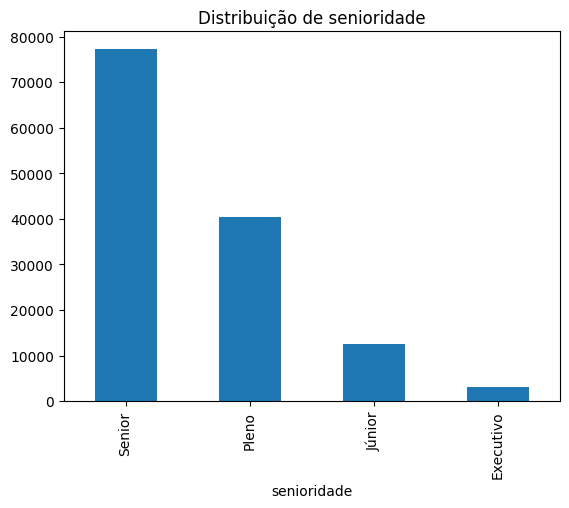

In [35]:
import matplotlib.pyplot as plt
df_limpo['senioridade'].value_counts().plot(kind= 'bar', title="Distribuição de senioridade")
plt.show()

<Axes: xlabel='senioridade', ylabel='usd'>

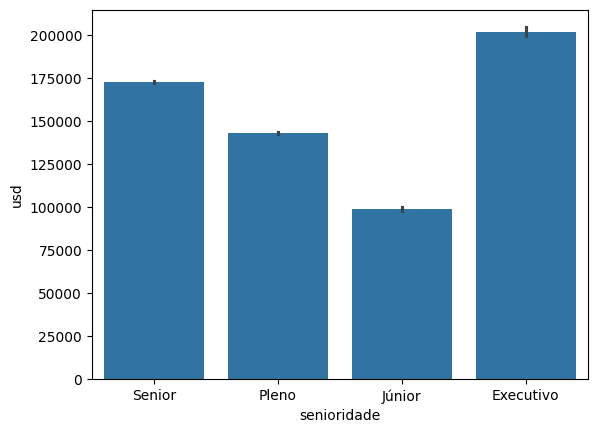

In [36]:
import seaborn as sns
sns.barplot(data=df_limpo, x='senioridade', y='usd')

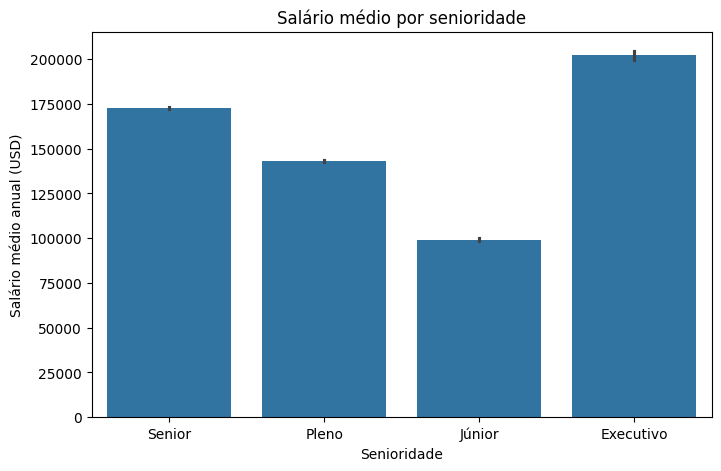

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x= 'senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [38]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Júnior        99034.963267
Name: usd, dtype: float64

In [39]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Júnior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

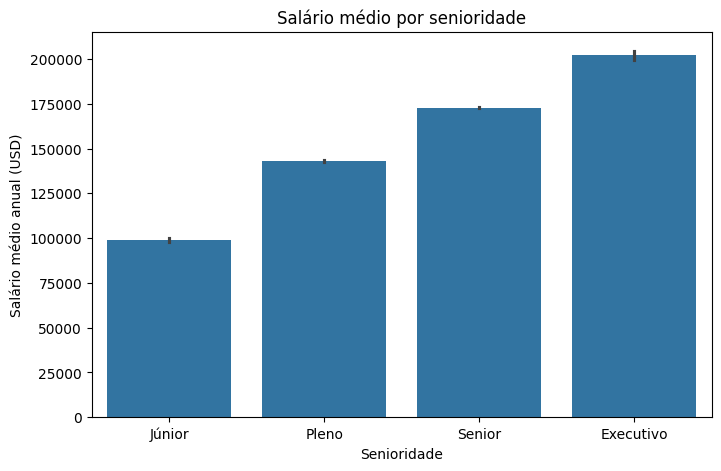

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x= 'senioridade', y='usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

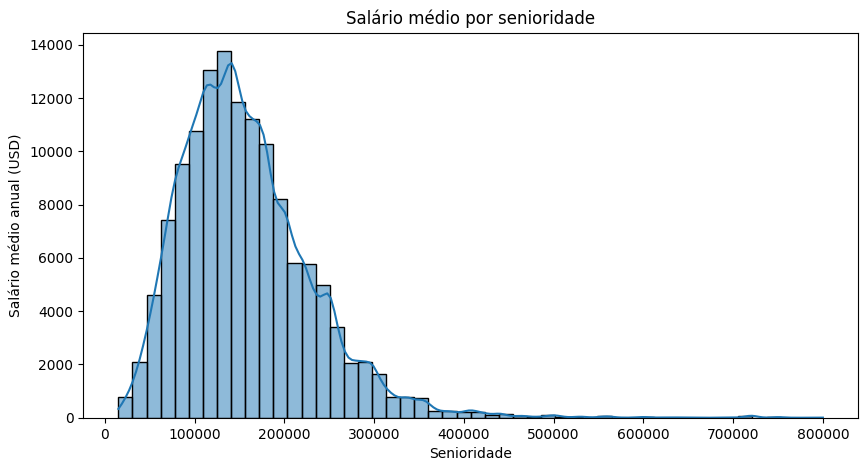

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True) 
plt.title('Salário médio por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

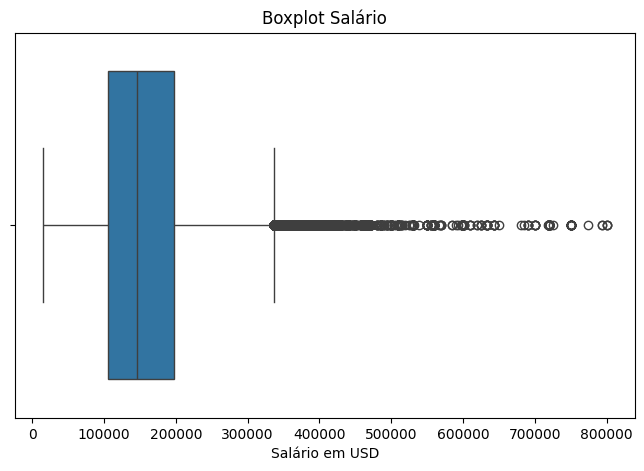

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

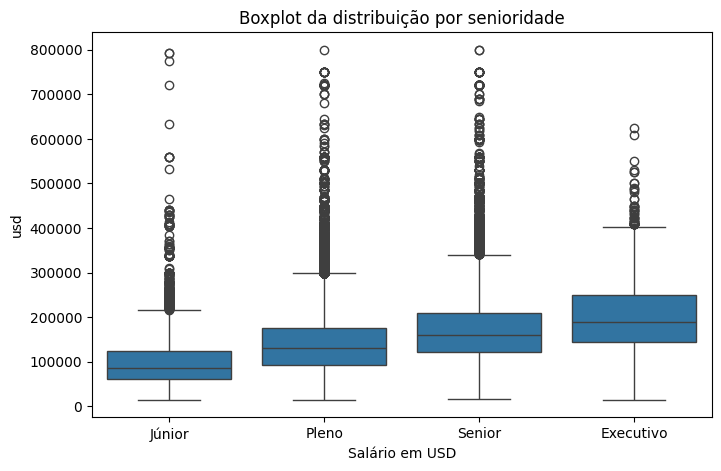

In [43]:
ordem_senioridade = ['Júnior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

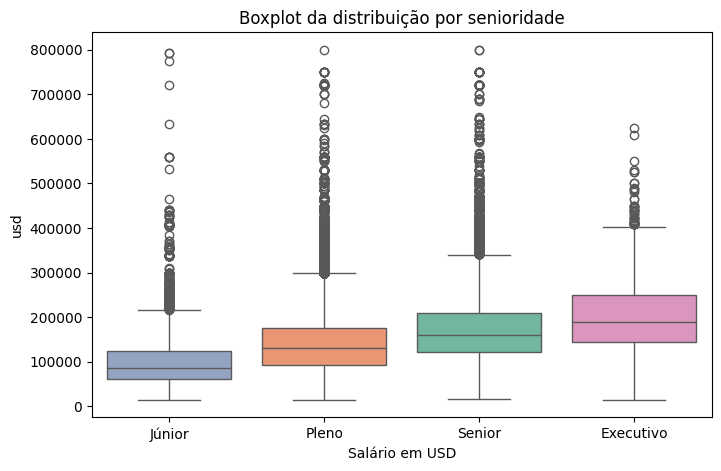

In [44]:
ordem_senioridade = ['Júnior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [45]:
import plotly.express as px
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salario, x='senioridade', y='usd', title= 'Média Salarial por Senioridade', labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual'})
fig.show()

In [46]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()

In [47]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
)
fig.show()

In [48]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [49]:
import pycountry
#Metodo para converter ISO-2 em ISO-3
def iso2_para_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

#Criano uma nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_para_iso3)

#Calculando a média salarial por país
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_data_scientist_pais = df_data_scientist.groupby('residencia_iso3')['usd'].mean().reset_index()

#Gerando o mapa
fig = px.choropleth(media_data_scientist_pais, locations='residencia_iso3', color='usd', color_continuous_scale='rdylgn', title='Salário médio de Cientista de Dados por país', labels={'usd': 'Salário Médio Anual (USD)', 'residencia_iso3': 'País'})

fig.show()


In [50]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [51]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)